In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load data
df = pd.read_csv('trip_data.csv')
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
df.head()

Dataset Shape: (10000, 23)

First few rows:


,trip_id,timestamp,hour,day_of_week,is_weekend,vehicle_id,vehicle_type,vehicle_lat,vehicle_lon,origin_lat,...,pickup_distance,pickup_eta,trip_distance,trip_duration,surge_multiplier,fare,user_preference,lat_bin,lon_bin,grid_id
0,TRIP_000001,2024-03-02 06:39:00,6,5,True,VEH_1802,SUV,13.007579,77.655650,13.032063,...,9.25,15.75,1.78,3.15,1.15,187.85,cheap,1303,7773,1303_7773
1,TRIP_000002,2024-05-07 03:29:00,3,1,False,VEH_2510,Mini,13.085762,77.727982,12.944116,...,15.72,28.52,21.82,44.76,1.04,370.21,fast,1294,7773,1294_7773
2,TRIP_000003,2024-05-01 08:48:00,8,2,False,VEH_0587,Auto,12.936337,77.622043,13.112997,...,19.77,76.95,29.87,146.47,1.89,1019.78,balanced,1311,7764,1311_7764
3,TRIP_000004,2024-06-23 04:28:00,4,6,True,VEH_1556,SUV,12.883759,77.574075,12.960020,...,16.36,21.78,24.77,35.31,1.05,800.94,balanced,1296,7770,1296_7770
4,TRIP_000005,2024-01-11 19:41:00,19,3,False,VEH_1572,Mini,12.989488,77.733553,12.867118,...,14.48,67.20,22.66,107.65,1.50,680.83,cheap,1286,7768,1286_7768


In [2]:
# Basic statistics
print("Dataset Statistics:")
print("="*50)
print(f"Total trips: {len(df):,}")
print(f"Date range: {df['timestamp'].min()} to {df['timestamp'].max()}")
print(f"\nAverage trip distance: {df['trip_distance'].mean():.2f} km")
print(f"Average trip duration: {df['trip_duration'].mean():.2f} minutes")
print(f"Average fare: ₹{df['fare'].mean():.2f}")
print("\nVehicle type distribution:")
print(df['vehicle_type'].value_counts())

Dataset Statistics:
Total trips: 10,000
Date range: 2024-01-01 00:17:00 to 2024-06-29 23:15:00

Average trip distance: 17.05 km
Average trip duration: 44.14 minutes
Average fare: ₹517.95

Vehicle type distribution:
vehicle_type
Mini     2542
Sedan    2541
SUV      2538
Auto     2379
Name: count, dtype: int64


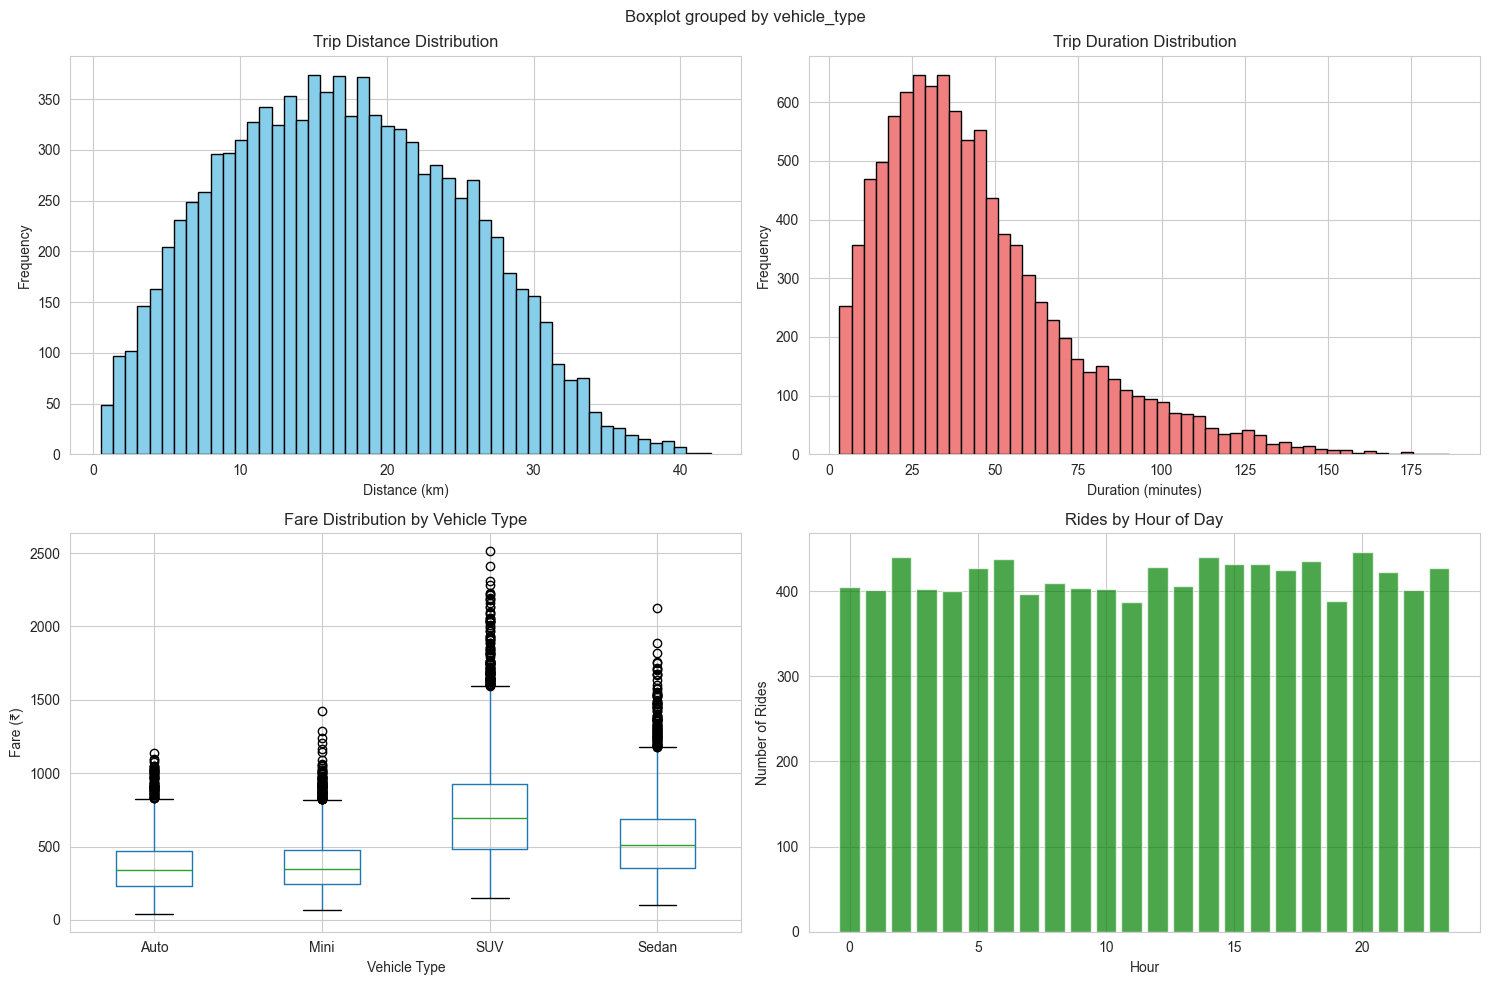

✓ Plots saved as 'analysis_plots.png'


In [4]:
# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Distance distribution
axes[0, 0].hist(df['trip_distance'], bins=50, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Trip Distance Distribution')
axes[0, 0].set_xlabel('Distance (km)')
axes[0, 0].set_ylabel('Frequency')

# Duration distribution
axes[0, 1].hist(df['trip_duration'], bins=50, color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Trip Duration Distribution')
axes[0, 1].set_xlabel('Duration (minutes)')
axes[0, 1].set_ylabel('Frequency')

# Fare by vehicle type
df.boxplot(column='fare', by='vehicle_type', ax=axes[1, 0])
axes[1, 0].set_title('Fare Distribution by Vehicle Type')
axes[1, 0].set_xlabel('Vehicle Type')
axes[1, 0].set_ylabel('Fare (₹)')

# Hourly demand
hourly_counts = df['hour'].value_counts().sort_index()
axes[1, 1].bar(hourly_counts.index, hourly_counts.values, color='green', alpha=0.7)
axes[1, 1].set_title('Rides by Hour of Day')
axes[1, 1].set_xlabel('Hour')
axes[1, 1].set_ylabel('Number of Rides')

plt.tight_layout()
plt.savefig('analysis_plots.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Plots saved as 'analysis_plots.png'")

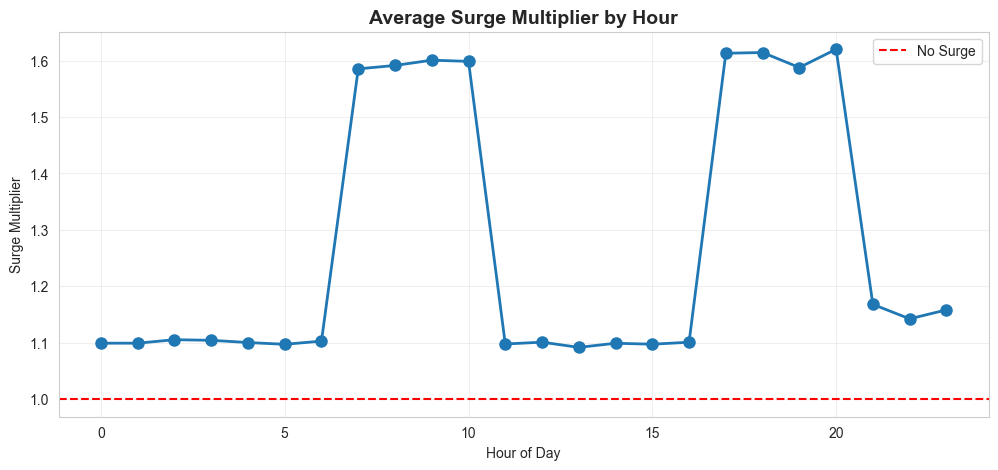

✓ Surge plot saved as 'surge_analysis.png'


In [5]:
# Surge analysis
surge_by_hour = df.groupby('hour')['surge_multiplier'].mean().sort_index()

plt.figure(figsize=(12, 5))
plt.plot(surge_by_hour.index, surge_by_hour.values, marker='o', linewidth=2, markersize=8)
plt.axhline(y=1.0, color='r', linestyle='--', label='No Surge')
plt.title('Average Surge Multiplier by Hour', fontsize=14, fontweight='bold')
plt.xlabel('Hour of Day')
plt.ylabel('Surge Multiplier')
plt.grid(True, alpha=0.3)
plt.legend()
plt.savefig('surge_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Surge plot saved as 'surge_analysis.png'")